In [1]:
import os
import xml.etree.ElementTree as etree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
actual_classes = os.listdir('./backup_bbox/images/')
actual_classes

['cat',
 'motorbike',
 'car',
 'aeroplane',
 'chair',
 'sofa',
 'dog',
 'diningtable',
 'bicycle',
 'train',
 'tvmonitor',
 'bottle',
 'person',
 'bird']

In [3]:
actual_classes[0]

'cat'

In [47]:
true_data_path = './bbox_dataset/annotations/'
all_annots = os.listdir(true_data_path)
na_files = []
for each_annot in all_annots:
    path = true_data_path + each_annot
    xml_file = etree.parse(path)
    root = xml_file.getroot()
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in actual_classes:
            fname = each_annot.split('.')[0]
            na_files.append(fname)
        else:
            continue

In [48]:
len(na_files)

0

In [49]:
len(os.listdir('./bbox_dataset/images/')), len(os.listdir('./bbox_dataset/annotations/'))

(6958, 6958)

In [46]:
imgs_path = './bbox_dataset/images/'
annot_path = './bbox_dataset/annotations/'
for each_file in na_files:
    img_file = os.path.join(imgs_path, each_file+'.jpg')
    annot_file = os.path.join(annot_path, each_file+'.xml')
    if os.path.exists(img_file) and os.path.exists(annot_file):
        os.remove(img_file)
        os.remove(annot_file)
        na_files.remove(each_file)
    else:
        print(each_file)

In [34]:
def plot_dict(dict_name):
    keys = [each_num for each_num in range(0, len(dict_name.keys()))]
    values = [len(each_list) for each_list in dict_name.values()]
    plt.figure(figsize=(20, 10))
    rects = plt.bar(keys, values, align='center')
    autolabel(rects)
    plt.xticks(keys, dict_name.keys())
    
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,'%d' % int(height),ha='center', va='bottom')

def get_class_distrib(top_level_direc, plot=False):
    classes = {}
    dirs = os.listdir(top_level_direc)
    for each_dir in dirs:
        full_path = os.path.join(top_level_direc, each_dir)
        class_count = len(os.listdir(full_path))
        classes[each_dir] = class_count
    if plot:
        plt.figure(figsize=(20, 8))
        x, y = list(classes.keys()), list(classes.values())
        x_dummy = range(len(x))
        rects = plt.bar(x_dummy, y, align='center')
        autolabel(rects)
        plt.xticks(x_dummy, x)
        plt.show()
    return classes

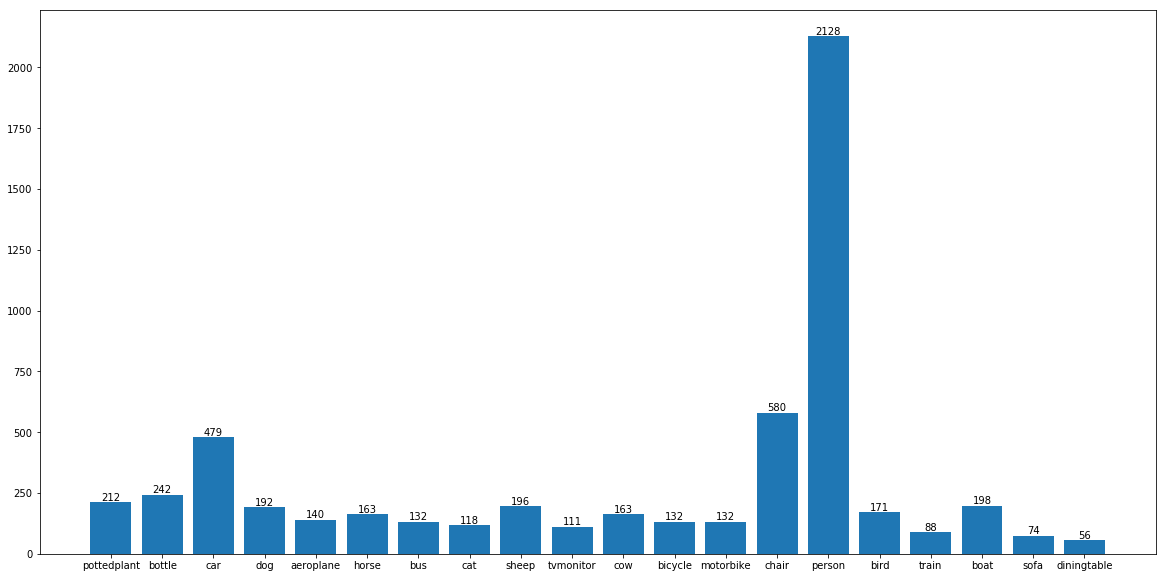

In [32]:
plot_dict(na_files)

In [33]:
# removing these files with more than one object

img_path = './bbox_dataset/images/'
annot_path = './bbox_dataset/annotations/'
for each_class, files in na_files.items():
    cmp_img_path = os.path.join(img_path, each_class)
    cmp_annot_path = os.path.join(annot_path, each_class)
    for each_file in files:
        fname = each_file.split('.')[0]
        os.remove(os.path.join(cmp_img_path, fname + '.jpg'))
        os.remove(os.path.join(cmp_annot_path, fname + '.xml'))

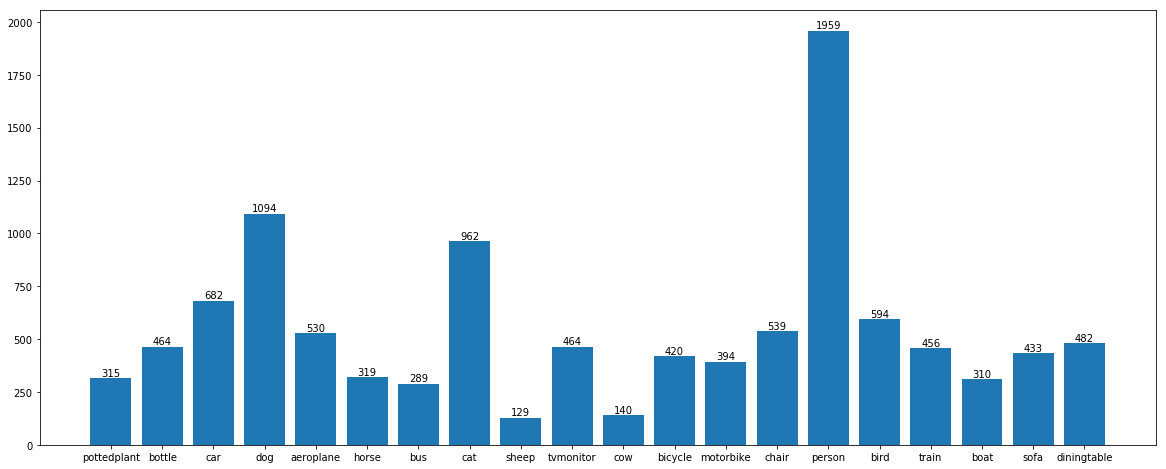

{'aeroplane': 530,
 'bicycle': 420,
 'bird': 594,
 'boat': 310,
 'bottle': 464,
 'bus': 289,
 'car': 682,
 'cat': 962,
 'chair': 539,
 'cow': 140,
 'diningtable': 482,
 'dog': 1094,
 'horse': 319,
 'motorbike': 394,
 'person': 1959,
 'pottedplant': 315,
 'sheep': 129,
 'sofa': 433,
 'train': 456,
 'tvmonitor': 464}

In [36]:
get_class_distrib('./bbox_dataset/images/', plot=True)

In [8]:
import numpy as np

In [3]:
#after getting to know the class distribution, wanted a batch generator which would fetch files

train_image_folder = './bbox_dataset/images/'
train_annot_folder = './bbox_dataset/annotations/'

from preprocessing import parse_annotation, BatchGenerator

Using TensorFlow backend.


In [50]:
LABELS = ['aeroplane', 'bicycle', 'bird', 'bottle', 'car', 'cat', 'chair', 'diningtable', 'dog', 'motorbike', 'person',
         'sofa', 'train', 'tvmonitor']

In [51]:
train_imgs, seen_train_labels = parse_annotation(train_annot_folder, train_image_folder, labels=LABELS)

In [53]:
len(train_imgs)

6958